# EXPLORATORY DATA ANALYSIS ON A DATASET

#  1.Data Cleaning and Preparation

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the dataset 
df = pd.read_csv("Cardiotocographic.csv")

In [22]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [23]:
#Handle missing values 
# Check for missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

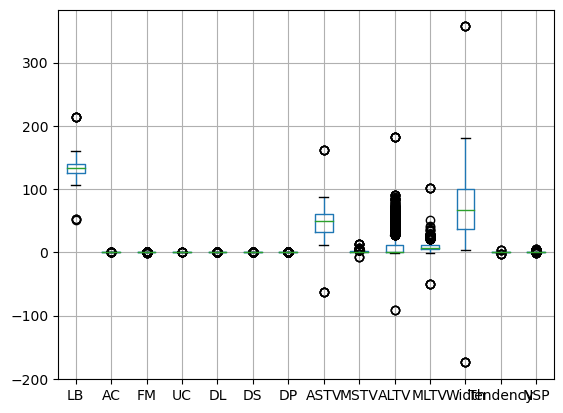

In [24]:
df.boxplot()
plt.show() 

In [25]:
# Outliers are present so replace missing values with median
# If there is no outliers replace with mean
# If the data in columns are categorical variables means not numerical then replace with mode
numerical_cols_with_missing = ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

In [26]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [27]:
#Identify and correct any inconsistencies in data types 
#All columns have float data there for no need to change datatype
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

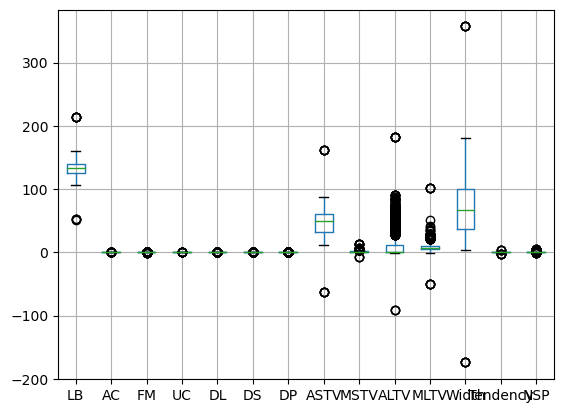

In [28]:
#Detect and treat outliers
df.boxplot()
plt.show() 

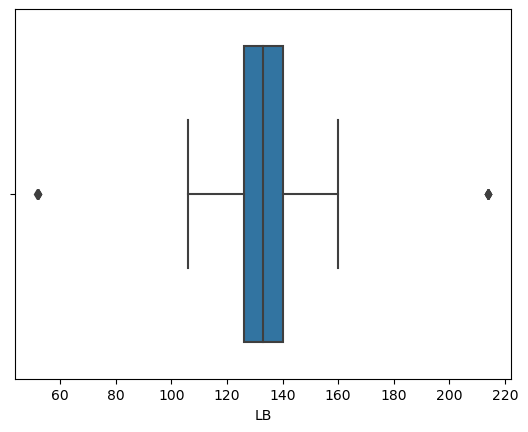

In [29]:
sns.boxplot(x = df['LB'])
plt.show() 

In [34]:
# Fetch all column name
features = df.columns.tolist()
features

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Tendency',
 'NSP']

In [35]:
columns_to_check = features
#Calculate IQR
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

In [36]:
#Replace outliers
for col in columns_to_check:
    # Lower outliers (values below Q1 - 1.5 * IQR)
    df[col] = np.where(df[col] < (Q1[col] - 1.5 * IQR[col]), Q1[col] - 1.5 * IQR[col], df[col])
    
    # Higher outliers (values above Q3 + 1.5 * IQR)
    df[col] = np.where(df[col] > (Q3[col] + 1.5 * IQR[col]), Q3[col] + 1.5 * IQR[col], df[col])

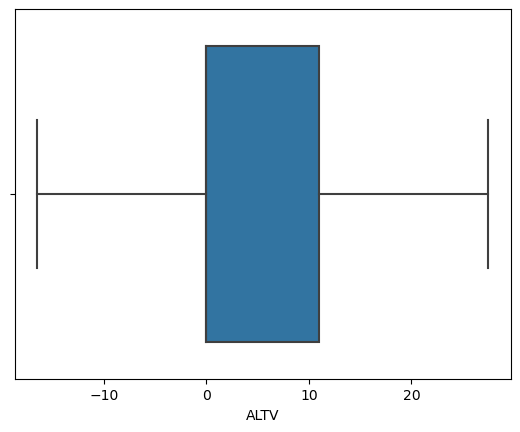

In [38]:
sns.boxplot(x = df['ALTV'])
plt.show() 

# 2.Statistical Summary

In [39]:
df.describe()

LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.290331     0.003132     0.001568     0.004362     0.001770   
std       9.930268     0.003828     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.007471   
std       0.0     0.0    17.612745     0.781091    10.378400     5.047078   
min       0.0     0.0   -11.500000    -0.800000   -16.500000    -4.700000   
25%       0.0     0.0    32.000000     0.700000     0.000000     4.600000   
50%       0.0     0.0    49.000000     1.200000     0.000000     7.400000   
75%       0.0     0.0    61.000000     1.700000    11.000000    10.800000   
max       0.0     0.0   104.500000     3.200000    27.500000    20.100000   

             Width     Tendency     NSP  
count  2126.000000  2126.000000  2126.0  
mean     70.287203     0.316537     1.0  
std      39.571995     0.622406     0.0  
min     -57.500000    -1.500000     1.0  
25%      37.000000     0.000000     1.0  
50%      67.000000     0.000000     1.0  
75%     100.000000     1.000000     1.0  
max     194.500000     2.500000     1.0

In [41]:
pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Standard Deviation': df.std(),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})
# If the mean is higher or lower than median then there is some skewness present in data
# If there is large IQR then outliers are present

# Width variable has high std and IQR, very wide spread of values
# DS and DP have mean,median,std and IQr 0. Carry no useful information
# NSP have mean,median,std,IQr 1 and 0 values . it could be binary or categorical variable

Mean      Median  Standard Deviation        IQR
LB        133.290331  133.000000            9.930268  14.000000
AC          0.003132    0.001634            0.003828   0.005606
FM          0.001568    0.000000            0.002485   0.002567
UC          0.004362    0.004484            0.003001   0.004685
DL          0.001770    0.000000            0.002668   0.003289
DS          0.000000    0.000000            0.000000   0.000000
DP          0.000000    0.000000            0.000000   0.000000
ASTV       46.981873   49.000000           17.612745  29.000000
MSTV        1.304644    1.200000            0.781091   1.000000
ALTV        6.691678    0.000000           10.378400  11.000000
MLTV        8.007471    7.400000            5.047078   6.200000
Width      70.287203   67.000000           39.571995  63.000000
Tendency    0.316537    0.000000            0.622406   1.000000
NSP         1.000000    1.000000            0.000000   0.000000

# 3.Data Visualization

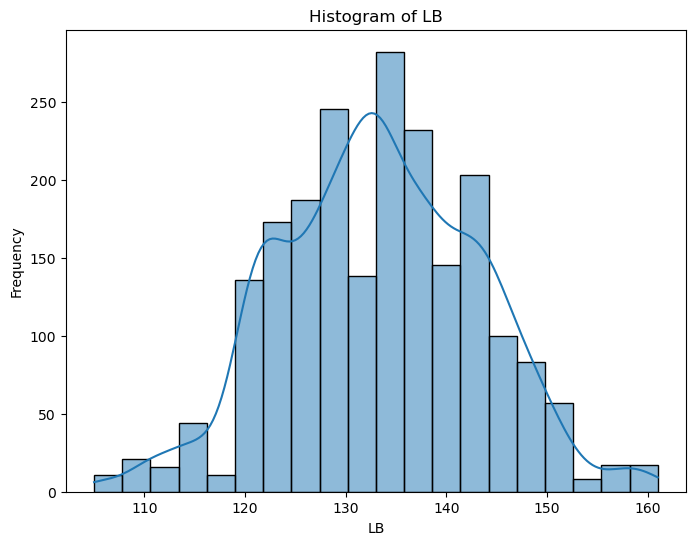

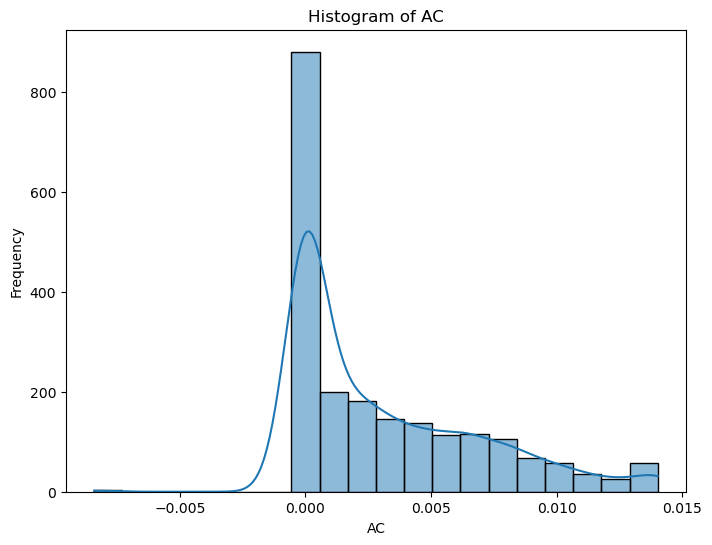

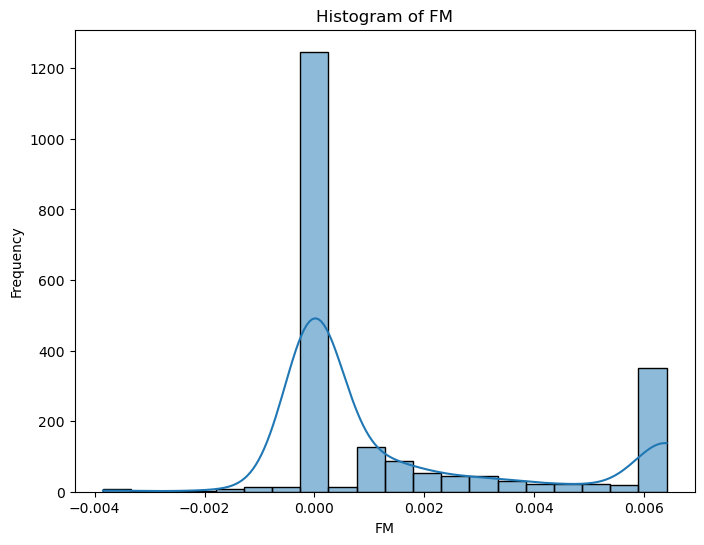

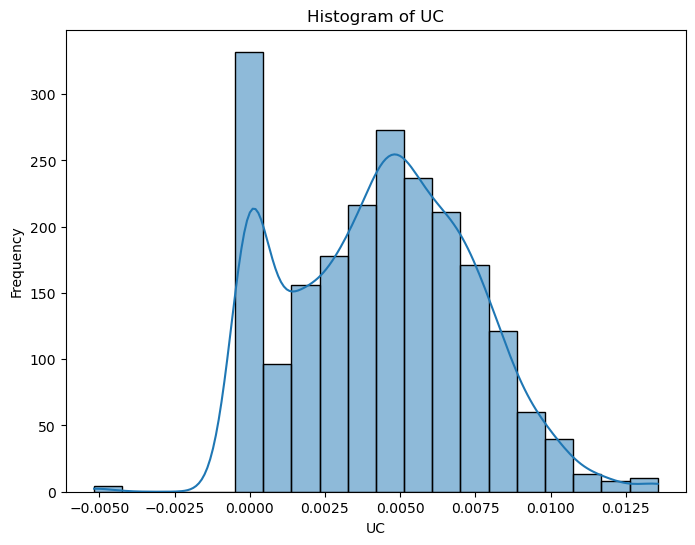

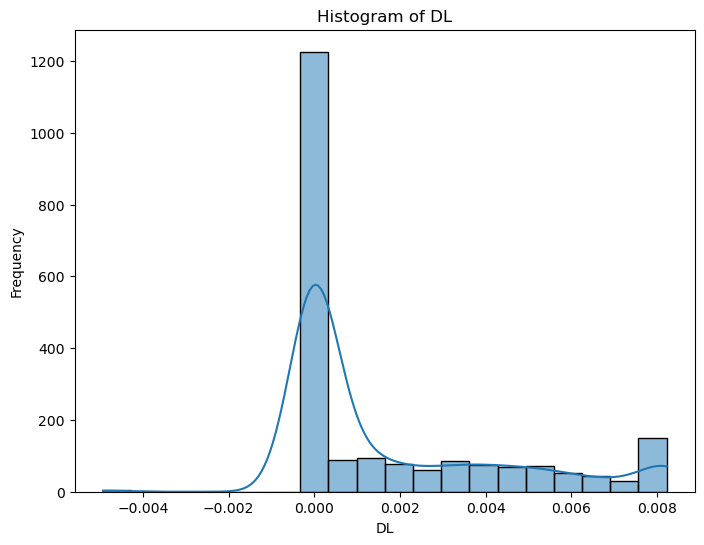

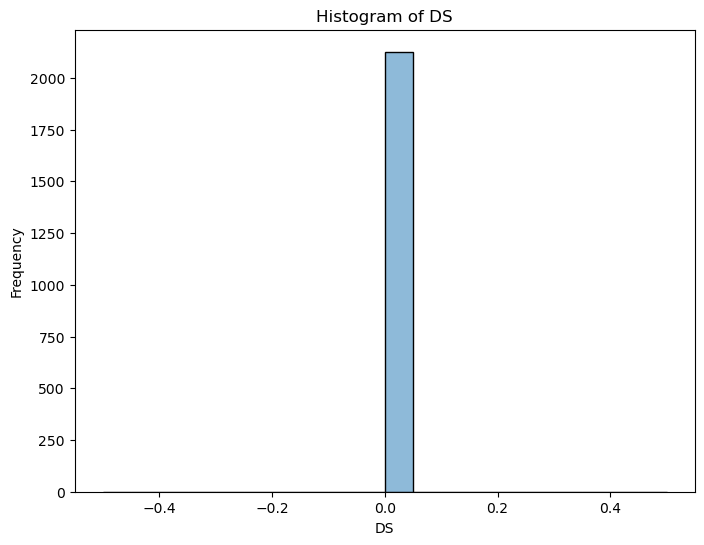

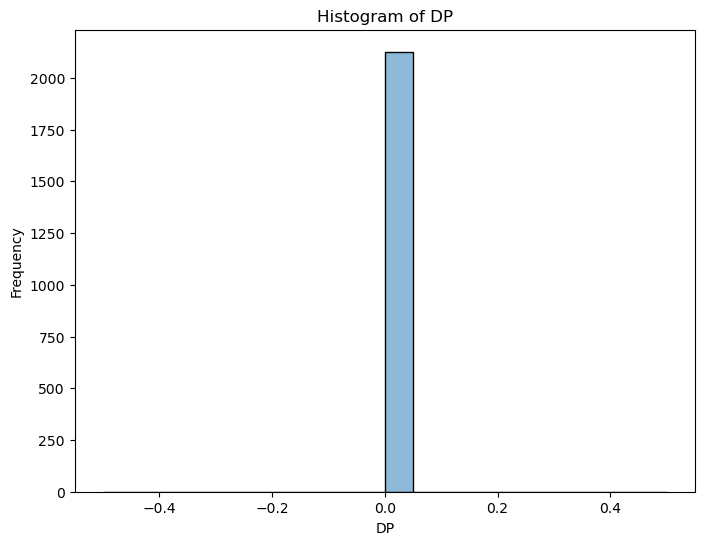

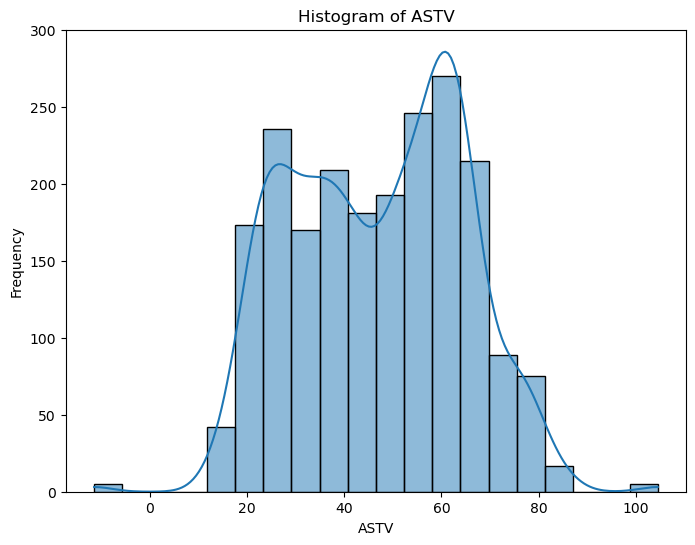

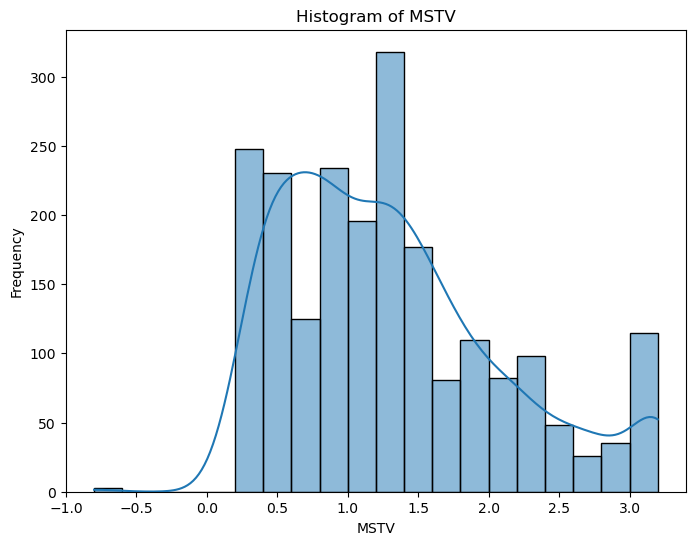

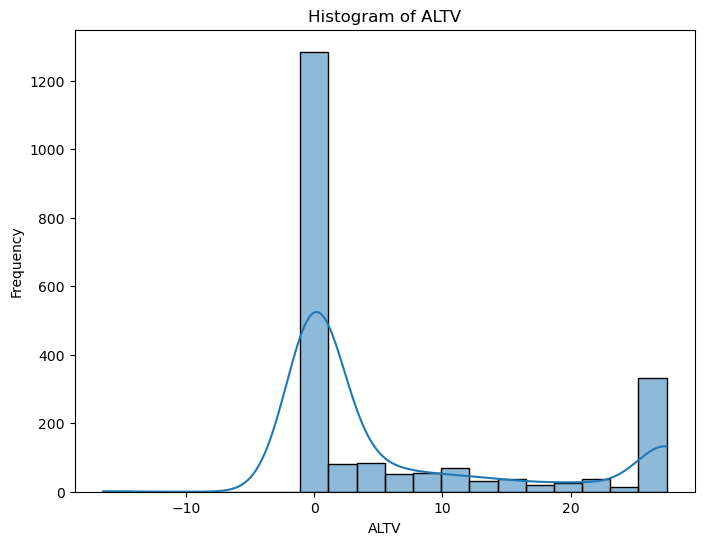

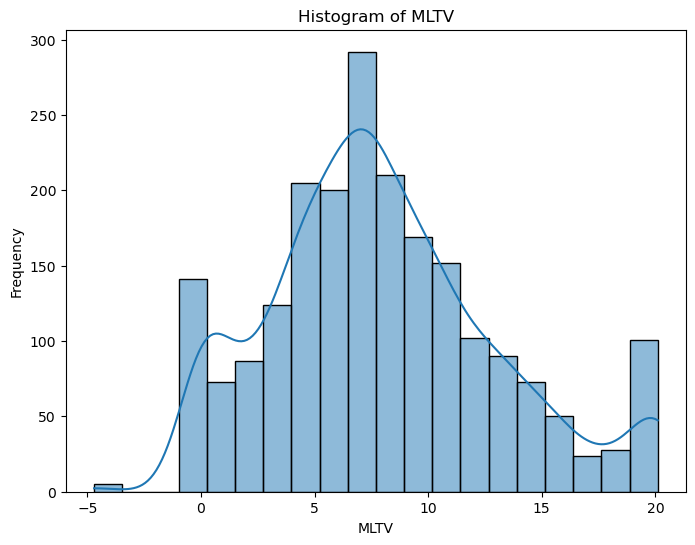

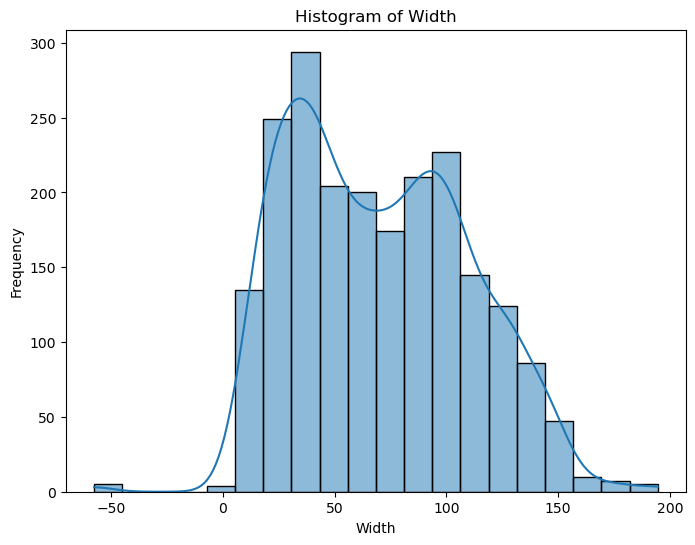

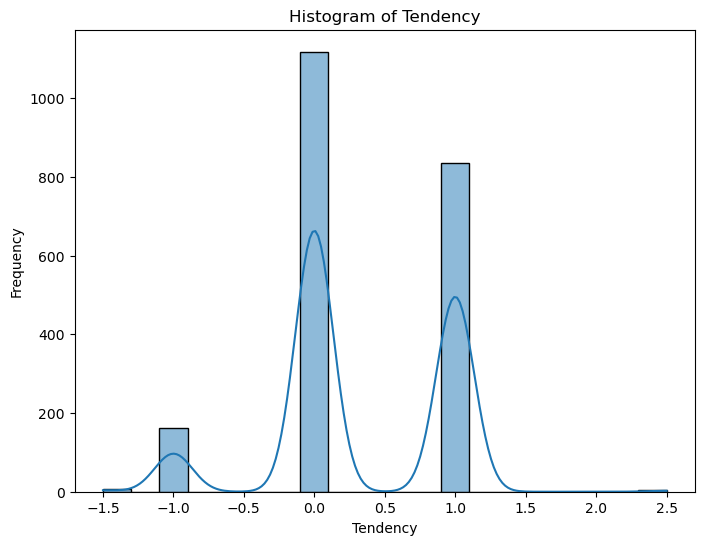

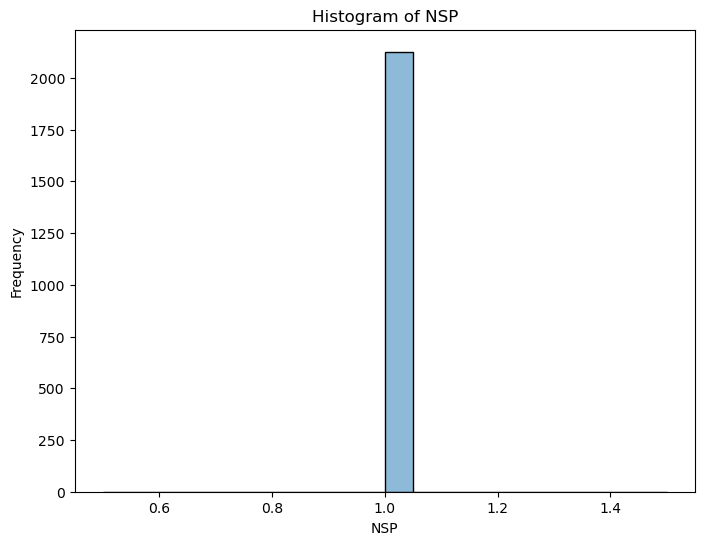

In [44]:
#Create histograms or boxplots
for var in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [61]:
# Constant column there is only one value
df.drop(['DS', 'DP' , 'NSP'], axis=1, inplace=True)

In [62]:
#Use bar charts or pie charts
# If there is categorical varible then use below code

#for col in features:
#    plt.figure(figsize=(8, 6))
#    sns.countplot(data=df, x=col)
#    plt.title(f'Frequency of Categories in {col}')
#    plt.xlabel(col)
#    plt.ylabel('Frequency')
#    plt.show()

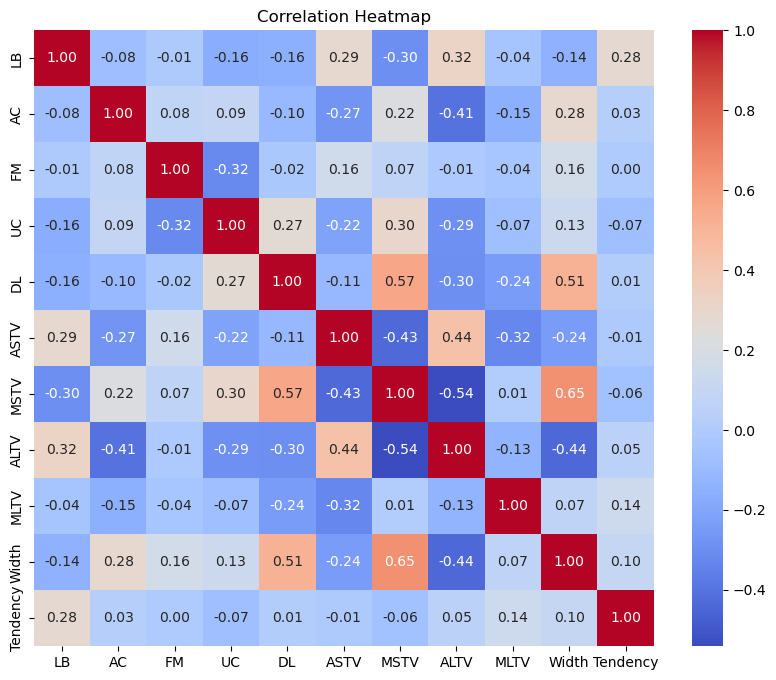

In [63]:
# Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

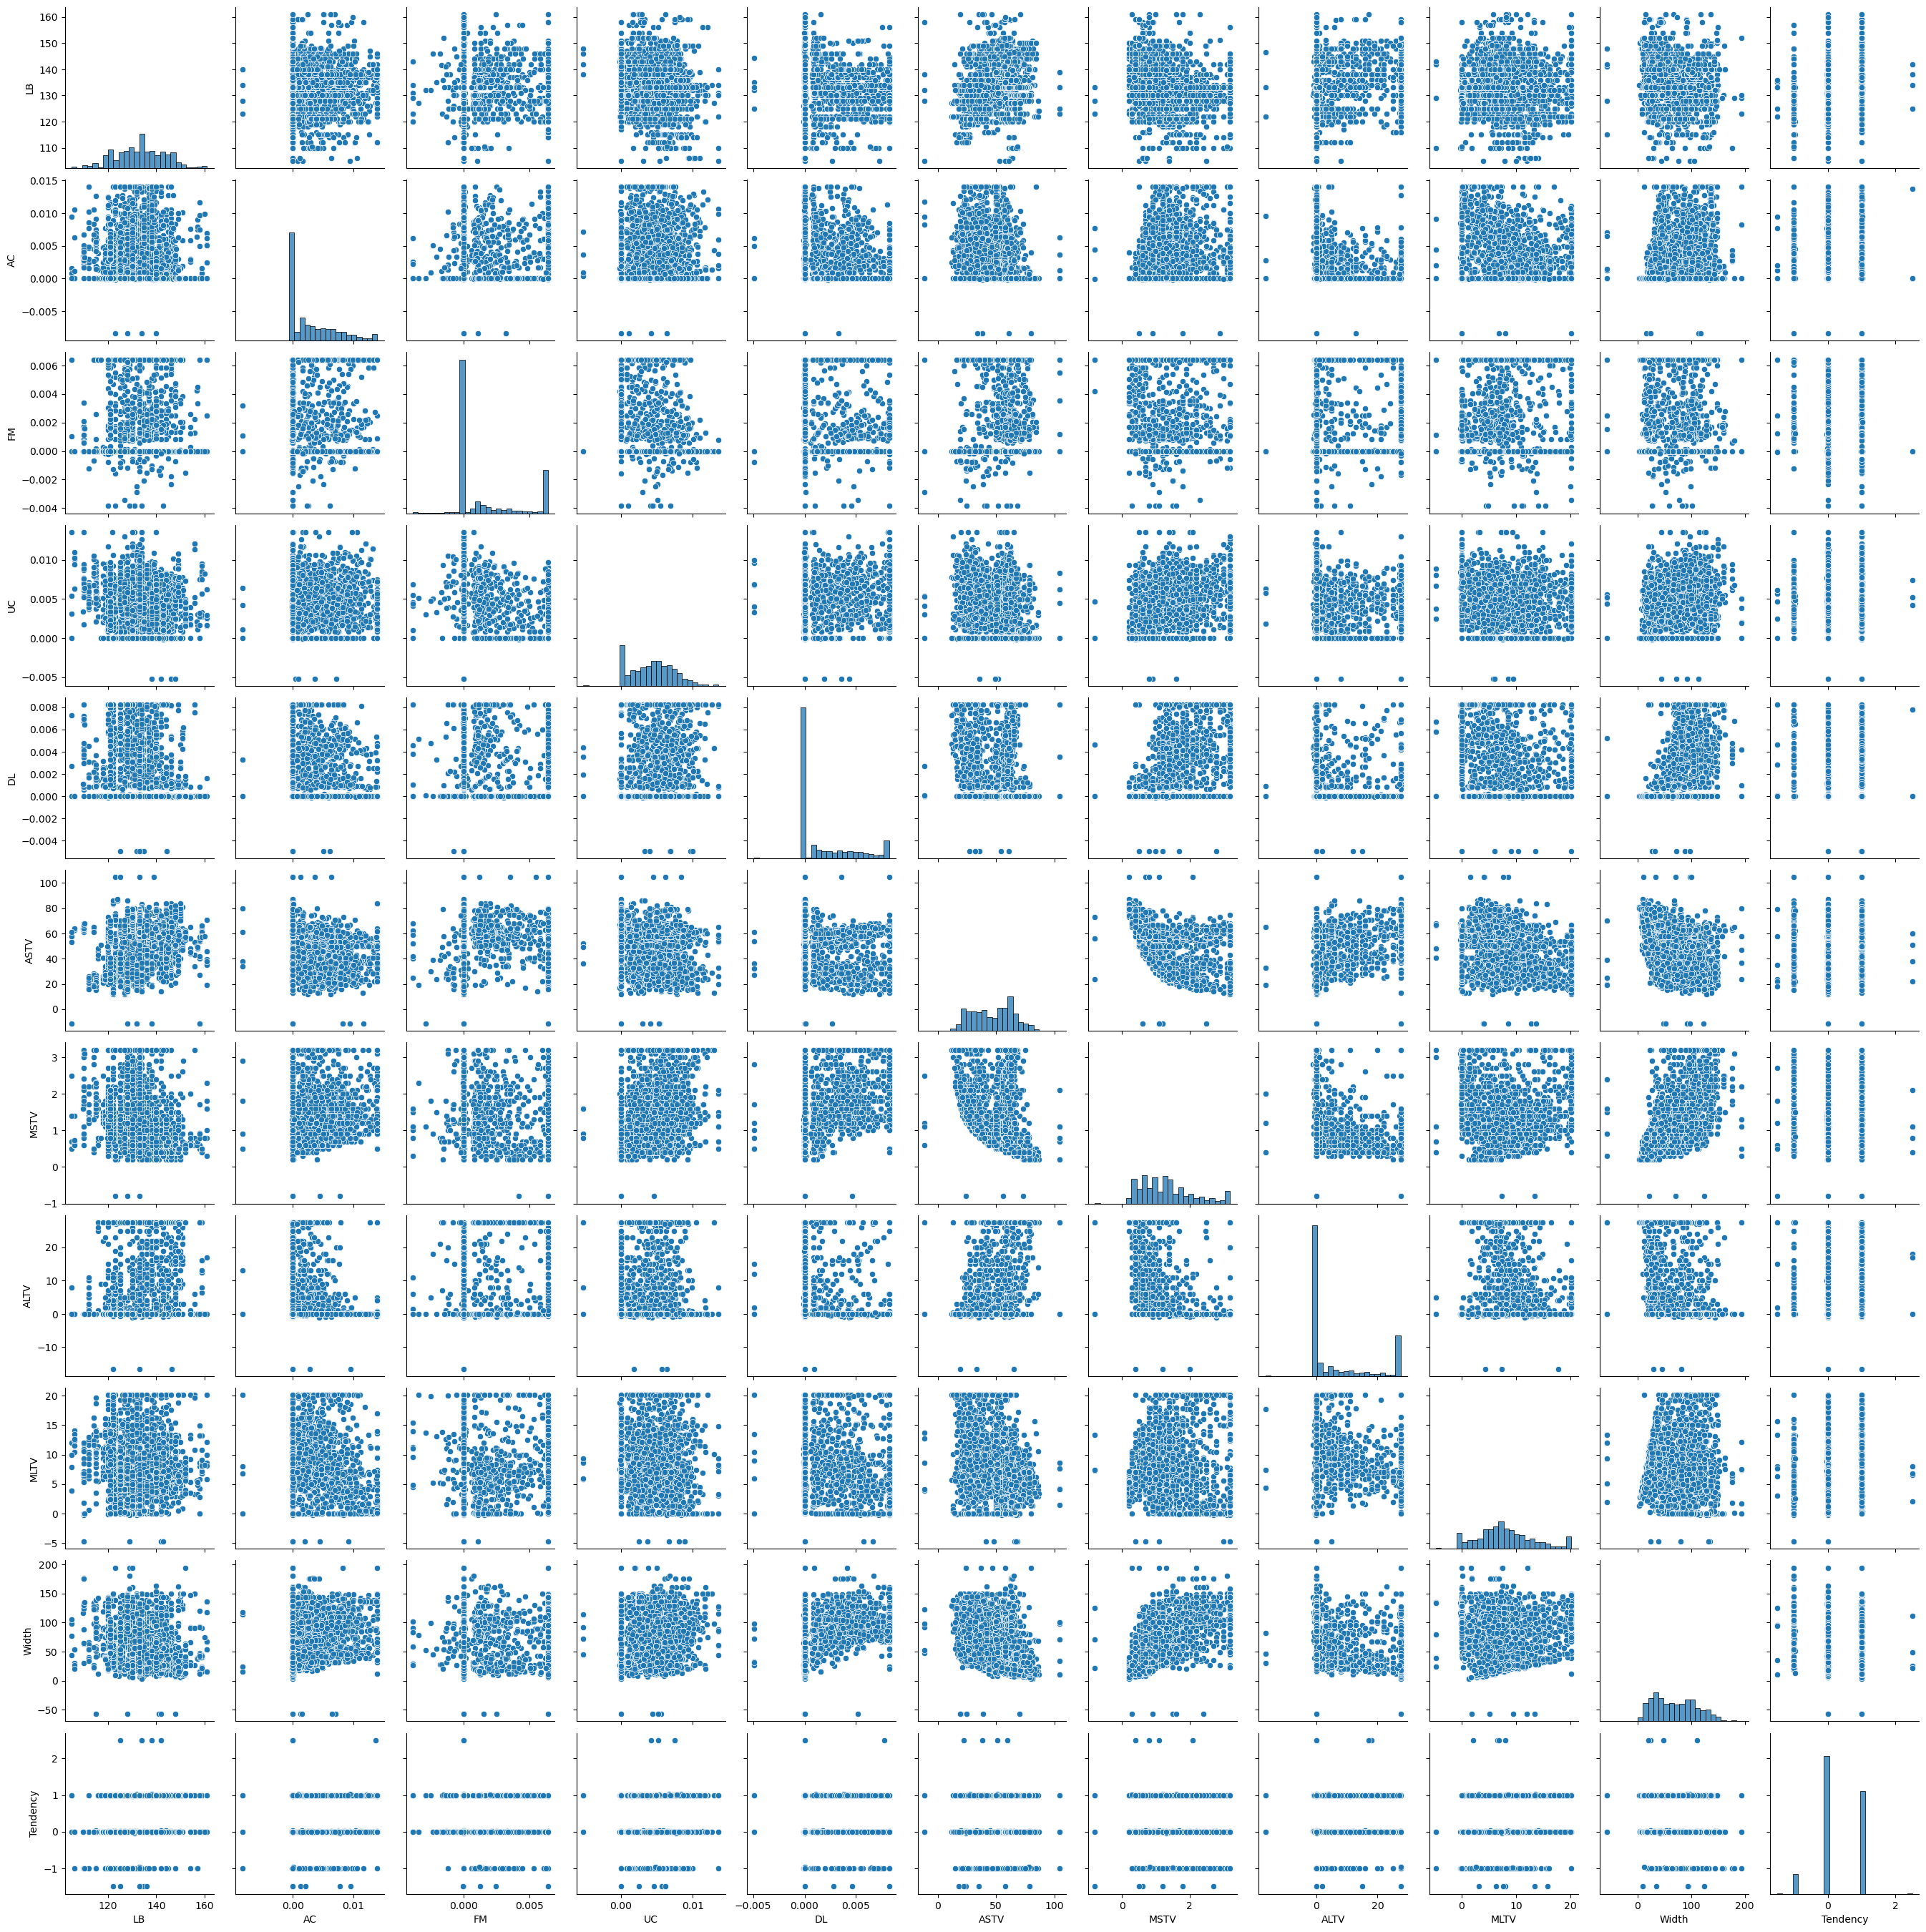

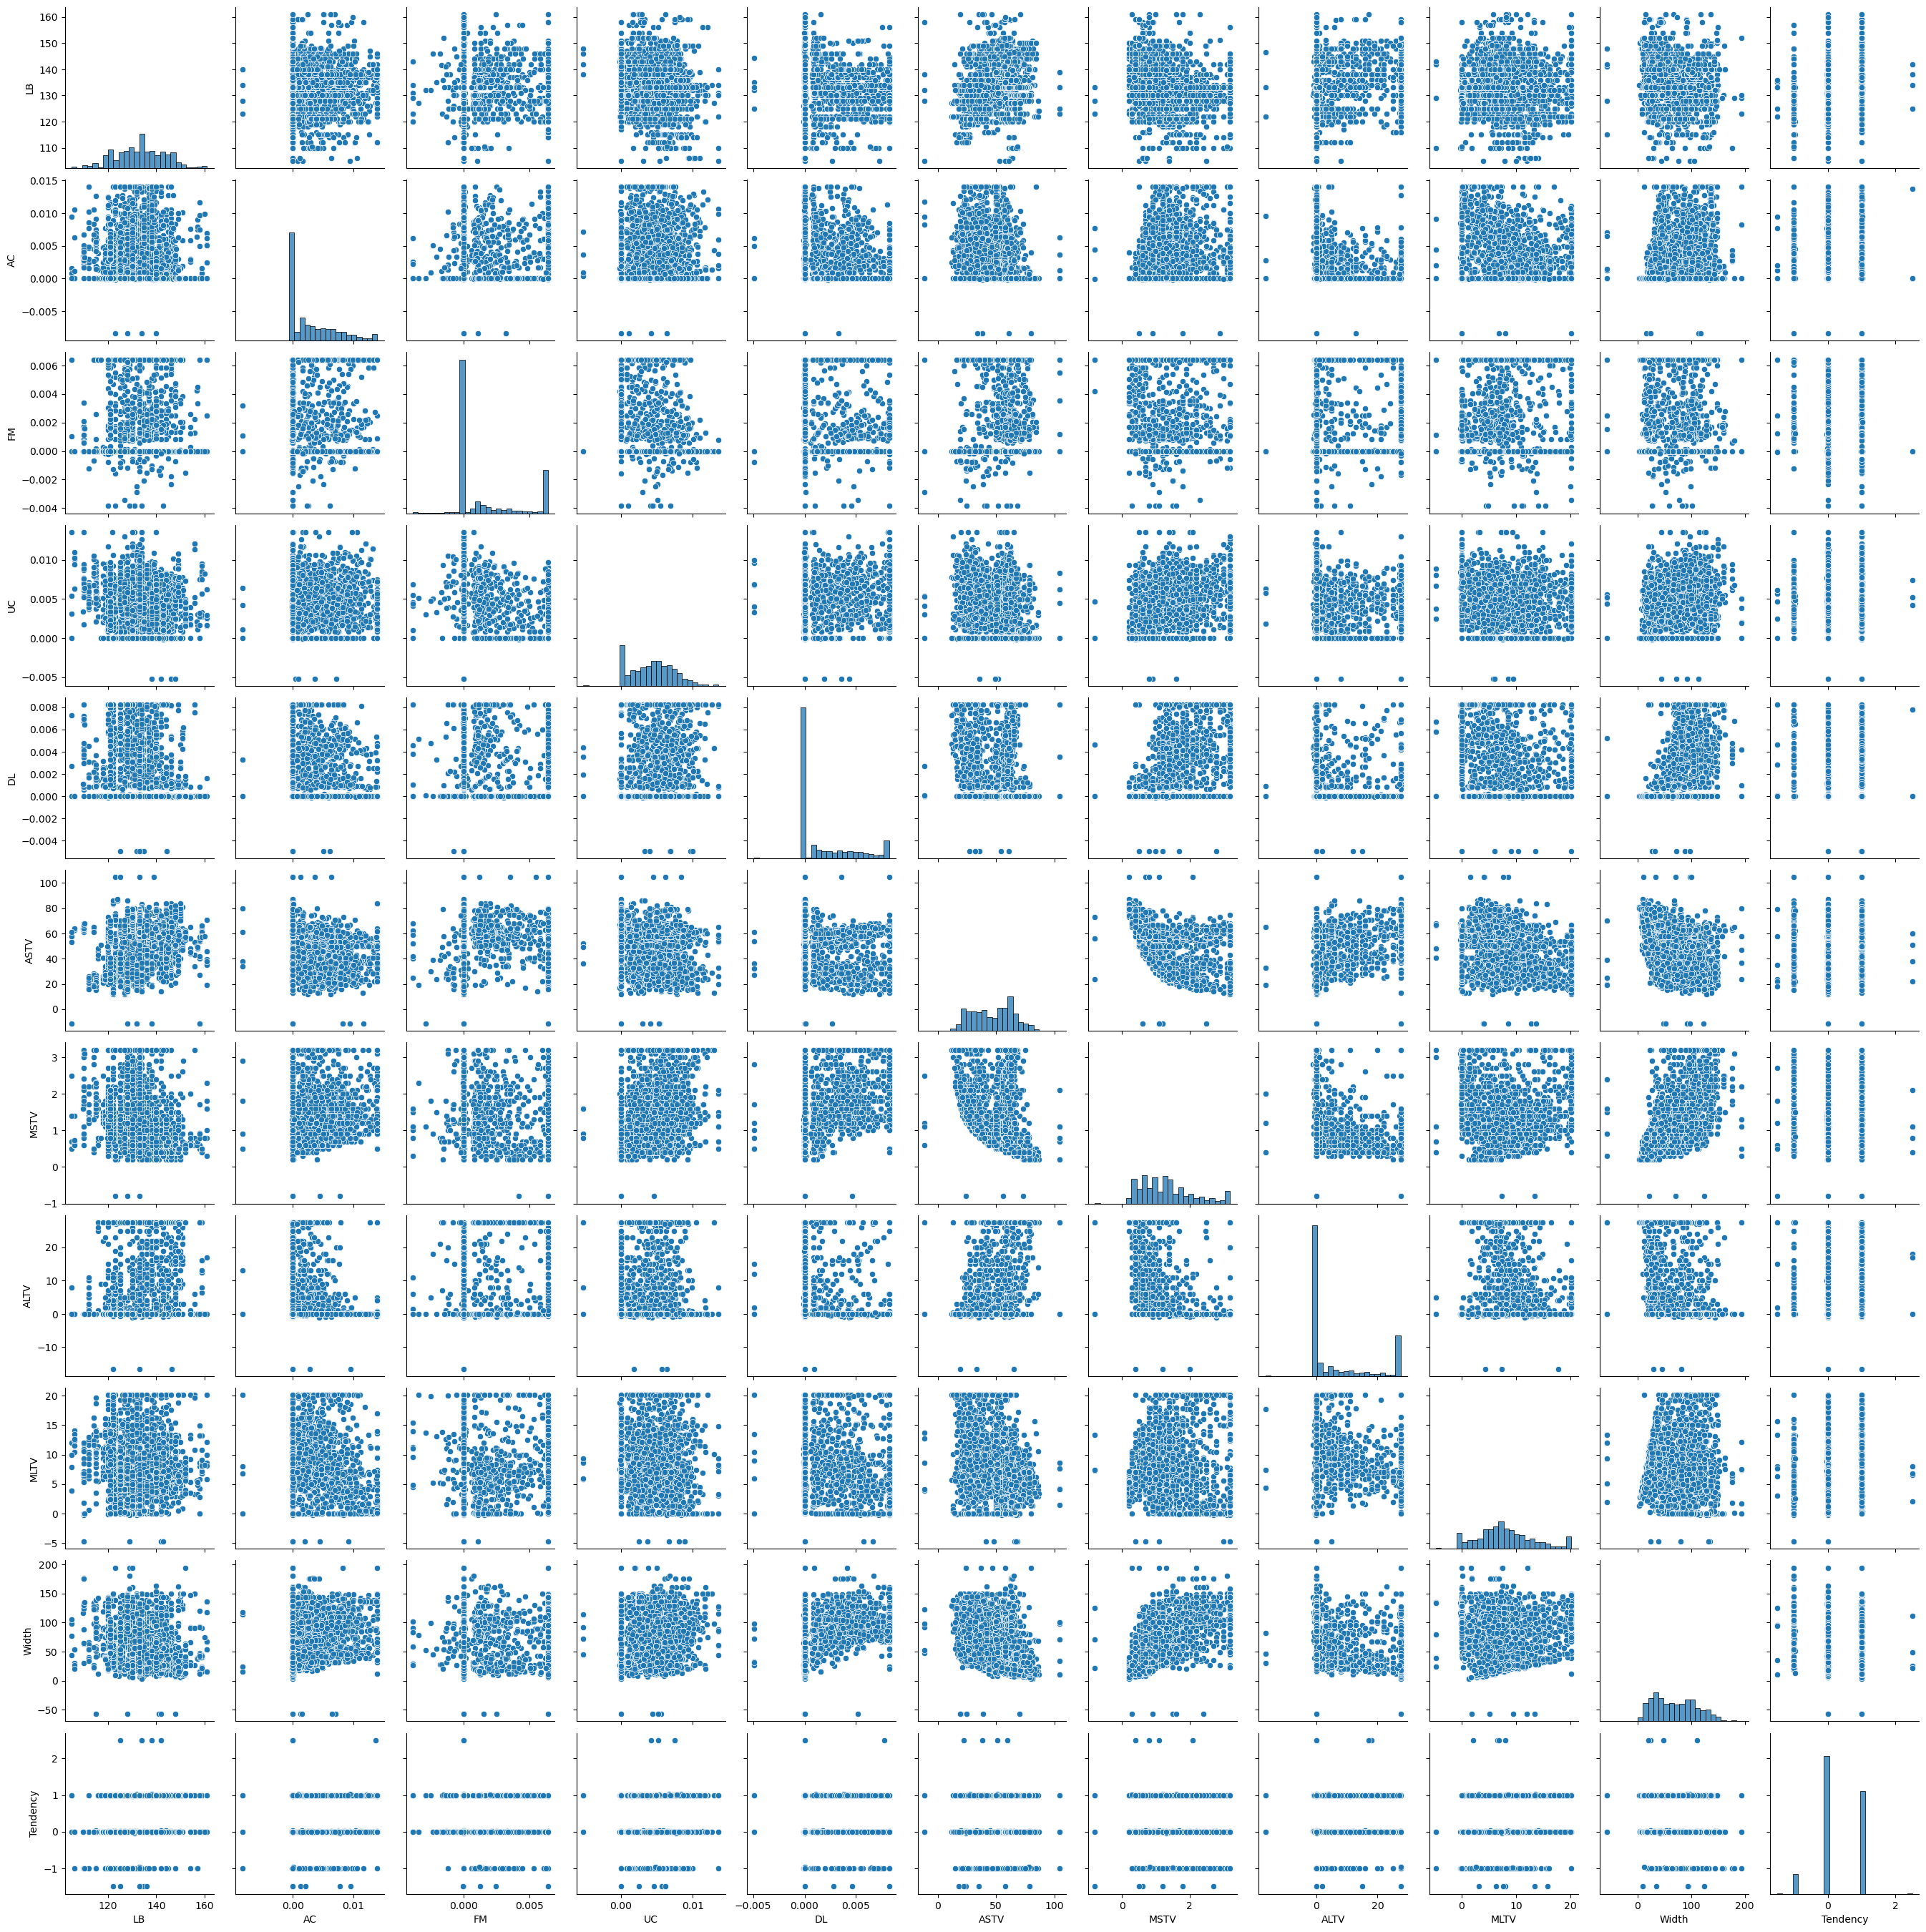

In [65]:
#Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
sns.pairplot(df)
plt.show()

# 4.Pattern Recognition and Insights

In [66]:
#Identify any correlations between variables and discuss their potential implications.


df.corr(numeric_only=True)

LB        AC        FM        UC        DL      ASTV  \
LB        1.000000 -0.080759 -0.006929 -0.162811 -0.156260  0.285623   
AC       -0.080759  1.000000  0.075669  0.093614 -0.103048 -0.272452   
FM       -0.006929  0.075669  1.000000 -0.317265 -0.017610  0.156351   
UC       -0.162811  0.093614 -0.317265  1.000000  0.268605 -0.215984   
DL       -0.156260 -0.103048 -0.017610  0.268605  1.000000 -0.111624   
ASTV      0.285623 -0.272452  0.156351 -0.215984 -0.111624  1.000000   
MSTV     -0.295600  0.216377  0.070300  0.297843  0.566340 -0.433844   
ALTV      0.322431 -0.408012 -0.013420 -0.293340 -0.295886  0.439040   
MLTV     -0.042578 -0.152012 -0.037001 -0.074192 -0.242728 -0.324702   
Width    -0.140015  0.283749  0.164579  0.131701  0.514538 -0.241119   
Tendency  0.280796  0.030557  0.000606 -0.074168  0.014407 -0.009754   

              MSTV      ALTV      MLTV     Width  Tendency  
LB       -0.295600  0.322431 -0.042578 -0.140015  0.280796  
AC        0.216377 -0.408012 -0.152012  0.283749  0.030557  
FM        0.070300 -0.013420 -0.037001  0.164579  0.000606  
UC        0.297843 -0.293340 -0.074192  0.131701 -0.074168  
DL        0.566340 -0.295886 -0.242728  0.514538  0.014407  
ASTV     -0.433844  0.439040 -0.324702 -0.241119 -0.009754  
MSTV      1.000000 -0.541156  0.011105  0.645744 -0.064733  
ALTV     -0.541156  1.000000 -0.133070 -0.438860  0.052496  
MLTV      0.011105 -0.133070  1.000000  0.072796  0.142188  
Width     0.645744 -0.438860  0.072796  1.000000  0.101645  
Tendency -0.064733  0.052496  0.142188  0.101645  1.000000

In [78]:
# You can analyze the correlation matrix to identify strong correlations between variables.
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1.0)]
strong_correlations

LB  AC  FM  UC        DL  ASTV      MSTV  ALTV  MLTV     Width  \
LB       NaN NaN NaN NaN       NaN   NaN       NaN   NaN   NaN       NaN   
AC       NaN NaN NaN NaN       NaN   NaN       NaN   NaN   NaN       NaN   
FM       NaN NaN NaN NaN       NaN   NaN       NaN   NaN   NaN       NaN   
UC       NaN NaN NaN NaN       NaN   NaN       NaN   NaN   NaN       NaN   
DL       NaN NaN NaN NaN       NaN   NaN  0.566340   NaN   NaN  0.514538   
ASTV     NaN NaN NaN NaN       NaN   NaN       NaN   NaN   NaN       NaN   
MSTV     NaN NaN NaN NaN  0.566340   NaN       NaN   NaN   NaN  0.645744   
ALTV     NaN NaN NaN NaN       NaN   NaN       NaN   NaN   NaN       NaN   
MLTV     NaN NaN NaN NaN       NaN   NaN       NaN   NaN   NaN       NaN   
Width    NaN NaN NaN NaN  0.514538   NaN  0.645744   NaN   NaN       NaN   
Tendency NaN NaN NaN NaN       NaN   NaN       NaN   NaN   NaN       NaN   

          Tendency  
LB             NaN  
AC             NaN  
FM             NaN  
UC             NaN  
DL             NaN  
ASTV           NaN  
MSTV           NaN  
ALTV           NaN  
MLTV           NaN  
Width          NaN  
Tendency       NaN

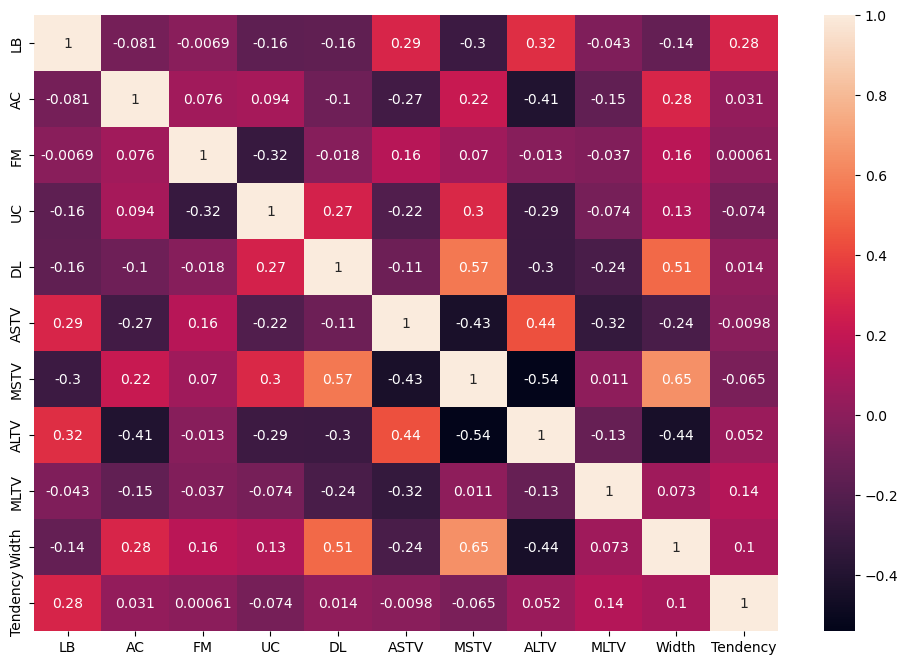

In [77]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [82]:
#Look for trends or patterns over time if temporal data is available.
#if there is temporal component it's important to explore how variables change over time
#plt.figure(figsize=(10, 6))
#df['DL'].plot()
#plt.title('Trend of DL')
#plt.xlabel('Time')
#plt.ylabel('DL')
#plt.show()

# 5.Conclusion

In [ ]:
#Key Insights and Patterns Discovered Through Exploratory Analysis:
#1.columns had missing values but after filling the missing values the dataset was prepared for further analysis
#2.the dataset was prepared for further analysis and were handled by min-max capping
#3.Strong correlations were found between some of the numerical variables .these variables might be related.

In [ ]:
#Discuss how these findings could impact decision-making or further analyses.
#1.identification of highly correlated features suggests that some variables could removed to improve model performance. 
#2.The removal of constant columns is important because such columns would not add any value to models